In [ ]:
# Predicting House Prices with Linear Regression

In [1]:
# Importing the Essentials 📚
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Data Gathering 📊

house_data = pd.read_csv("Housing.csv")

In [4]:
# Exploring the Dataset 🕵️‍♂️

print(house_data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [5]:
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
print(house_data.shape)

(545, 13)


In [7]:
# Cleaning the Data 🧹

print(house_data.isna().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
# Preparing the Data 🛠️

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
house_data[binary_columns] = house_data[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

status = pd.get_dummies(house_data['furnishingstatus'], drop_first=True)
house_data = pd.concat([house_data, status], axis=1)
house_data.drop(['furnishingstatus'], axis=1, inplace=True)

In [9]:
# Selecting Features 📋

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
            'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
            'parking', 'prefarea', 'semi-furnished', 'unfurnished']

In [10]:
# Building the Model 🛠️

X = house_data[features]
y = house_data['price']

In [12]:
# Training and Testing 📝

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Evaluating the Model 📊

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1754318687330.6633
R-squared: 0.6529242642153185


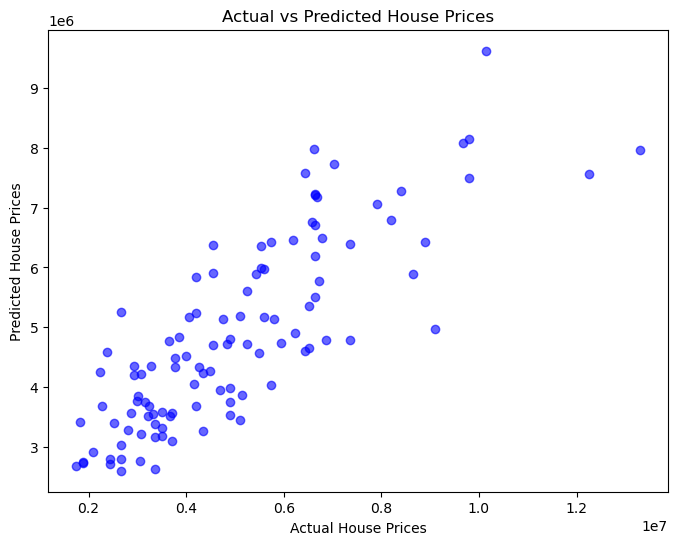

In [15]:
# Visualizing the Results 📈

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
